# **Build CNN Model for Classification Of Flowers**

# 1. LOAD THE DATASET


In [1]:
import numpy as np
import os
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/IBM/Flowers-Dataset.zip'

In [4]:
print(os.listdir("/content/drive/MyDrive/IBM/Flowers-Dataset/flowers"))

['rose', 'sunflower', 'tulip', 'daisy', 'dandelion']


# 2.IMAGE AUGMENTATION

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [7]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers', target_size=(64,64), class_mode='categorical', batch_size=100)

Found 4317 images belonging to 5 classes.


# 3. CREATING MODEL

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# 4. Adding layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [10]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

# 5. COMPILE THE MODEL

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 6. FIT THE MODEL

In [12]:
model.fit(xtrain, steps_per_epoch=len(xtrain), epochs=10,)

Epoch 1/10
44/44 [==============================] - 903s 20s/step - loss: 1.6776 - accuracy: 0.3857
Epoch 2/10
44/44 [==============================] - 38s 848ms/step - loss: 1.1048 - accuracy: 0.5460
Epoch 3/10
44/44 [==============================] - 37s 828ms/step - loss: 1.0327 - accuracy: 0.5942
Epoch 4/10
44/44 [==============================] - 35s 800ms/step - loss: 0.9751 - accuracy: 0.6183
Epoch 5/10
44/44 [==============================] - 40s 904ms/step - loss: 0.9310 - accuracy: 0.6356
Epoch 6/10
44/44 [==============================] - 38s 846ms/step - loss: 0.8832 - accuracy: 0.6593
Epoch 7/10
44/44 [==============================] - 36s 813ms/step - loss: 0.8375 - accuracy: 0.6850
Epoch 8/10
44/44 [==============================] - 35s 786ms/step - loss: 0.8006 - accuracy: 0.6905
Epoch 9/10
44/44 [==============================] - 37s 830ms/step - loss: 0.8026 - accuracy: 0.6912
Epoch 10/10
44/44 [==============================] - 37s 839ms/step - loss: 0.7627 - accurac

# 7. SAVE THE MODEL

In [13]:
model.save('flowers.h5')

# 8.TESTING THE MODEL

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image

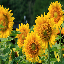

In [15]:
img = image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/sunflower/1008566138_6927679c8a.jpg',target_size=(64,64))
img

In [16]:
x = image.img_to_array(img)
x
x = np.expand_dims(x,axis=0)
x
model.predict(x)

1/1 [==============================] - 0s 204ms/step


array([[0., 0., 0., 1., 0.]], dtype=float32)

In [17]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [18]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 25ms/step


'sunflower'

## Testing

#### Tulip testing

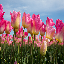

In [19]:
from numpy.lib.type_check import imag
img = image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/tulip/10128546863_8de70c610d.jpg',target_size=(64,64))
img

In [20]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 25ms/step


'tulip'

#### Rose testing

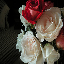

In [21]:
img = image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/rose/102501987_3cdb8e5394_n.jpg',target_size=(64,64))
img

In [22]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 27ms/step


'rose'

#### Daisy testing

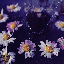

In [23]:
img = image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/daisy/10172567486_2748826a8b.jpg',target_size=(64,64))
img

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 26ms/step


'tulip'

#### Dandelion testing

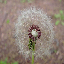

In [25]:
img = image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/dandelion/11405573_24a8a838cc_n.jpg',target_size=(64,64))
img

In [26]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 25ms/step


'dandelion'

#### Sunflower testing

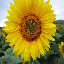

In [27]:
img = image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/sunflower/40410814_fba3837226_n.jpg',target_size=(64,64))
img

In [28]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 32ms/step


'sunflower'